# Graficando Dataframes de Pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

datos = {
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
}
df = pd.DataFrame(datos)
df.head()

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2


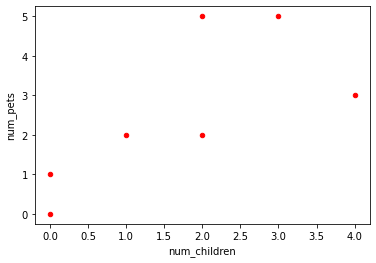

In [2]:
df.plot.scatter(x='num_children',y='num_pets',color='red')
plt.show()

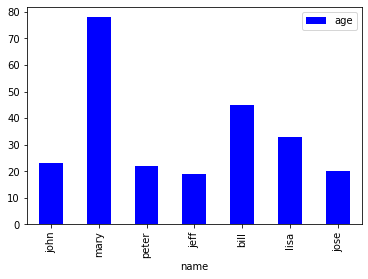

In [3]:
df.plot.bar(x='name',y='age', color='blue')
plt.show()

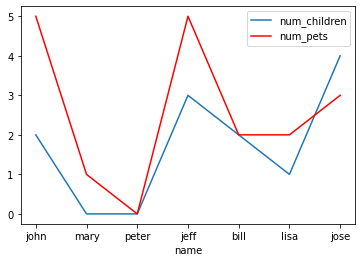

In [4]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot.line(x='name',y='num_children',ax=ax)
df.plot.line(x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Group by

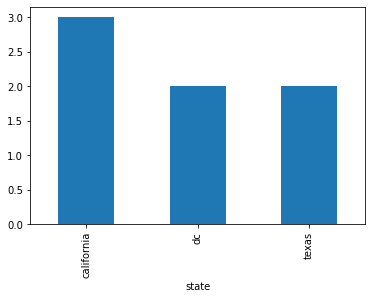

In [5]:
#Serie cuyo indice es el estado, y valor es la cantidad de unicos
df.groupby('state')['name'].nunique().plot.bar()
plt.show()

In [6]:
df.groupby(['state','gender']).size()

state       gender
california  M         3
dc          F         1
            M         1
texas       F         1
            M         1
dtype: int64

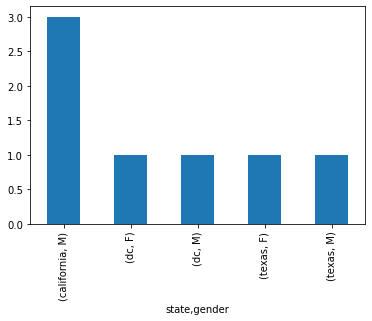

In [7]:
df.groupby(['state','gender']).size().plot.bar()
plt.show()

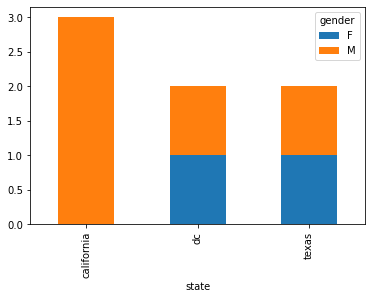

In [8]:
df.groupby(['state','gender']).size().unstack().plot.bar(stacked=True)
plt.show()

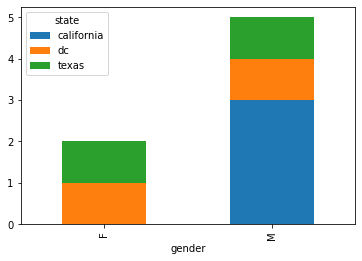

In [9]:
df.groupby(['gender','state']).size().unstack().plot.bar(stacked=True)
plt.show()

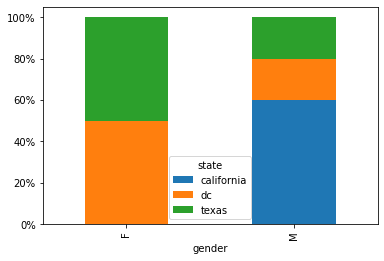

In [10]:
import matplotlib.ticker as mtick

df.groupby(['gender','state']).size().groupby(level=0) \
  .apply(lambda x: 100 * x / x.sum()) \
  .unstack().plot.bar(stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

[]

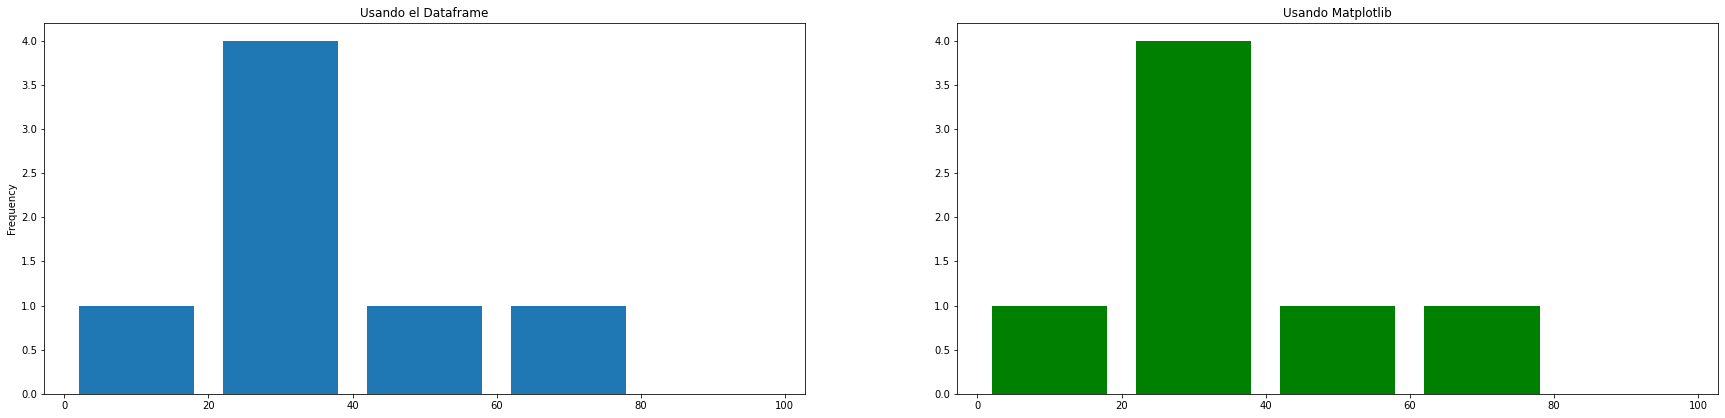

In [11]:
plt.figure(figsize=(30,15))

plt.subplot2grid((2, 2),(0,0))
df['age'].plot.hist(bins=[0,20,40,60,80,100],rwidth=0.8)
plt.title('Usando el Dataframe')

plt.subplot2grid((2, 2),(0,1))
plt.hist(df['age'],bins=[0,20,40,60,80,100],rwidth=0.8, color="g")
plt.title('Usando Matplotlib')
plt.plot()
